In [1]:
from pymongo import MongoClient
import pandas as pd
import numpy as np


In [3]:
top5CollsTrip = ["barcelona", "dublin", "amsterdam", "athens", "berlin"]
top5CollsTrip = [i+"Tripadvisor" for i in top5CollsTrip]
top5CollsBooking = ["edinburgh", "dublin", "manchester", "barcelona", "berlin"]
top5CollsBooking = [i+"Booking" for i in top5CollsBooking]

In [6]:
# connect to the db
client = MongoClient()
db = client.sentimentAnalysis

def getCollection(collName = ""):
    '''
    return pandas dataframe.
    '''
    cursor = db[collName].find({})
    df = pd.DataFrame(list(cursor))
    return df
    
    
    

In [7]:
BarcelonaTripDF = getCollection(top5CollsTrip[0])

In [8]:
BarcelonaTripDF.shape

(3072, 11)

In [10]:
BarcelonaTripDF[:3]

,_id,date,hotelLocation,hotelName,hotelStars,hotelUrl,review,score,title,url,userId
0,5987192c9b1f26681686008e,"July 31, 2017","Carrer Elisabets 11, 08001 Barcelona, Spain",Casa Camper Hotel Barcelona,4.0,https://www.tripadvisor.com/Hotel_Review-g1874...,It truly felt like coming home when we came th...,5.0,SO SO Happy to Be BACK!,https://www.tripadvisor.com/ShowUserReviews-g1...,Lili1012
1,5987192e9b1f26681686008f,"July 26, 2017","Carrer Elisabets 11, 08001 Barcelona, Spain",Casa Camper Hotel Barcelona,4.0,https://www.tripadvisor.com/Hotel_Review-g1874...,Perfect place to stay in Barcelona.. We spent ...,5.0,Perfect,https://www.tripadvisor.com/ShowUserReviews-g1...,AimamKaur
2,598719309b1f266816860090,"July 26, 2017","Carrer Elisabets 11, 08001 Barcelona, Spain",Casa Camper Hotel Barcelona,4.0,https://www.tripadvisor.com/Hotel_Review-g1874...,This hotel is ideally placed within reasonable...,5.0,Nothing was too much trouble,https://www.tripadvisor.com/ShowUserReviews-g1...,Tisketsmum


In [23]:
# calculate the number of words in each reviews data and then add it as a new column
from nltk.tokenize.regexp import WhitespaceTokenizer
reviewsLen = list()
bagWords = list()
def calculateWordCount(review = ""):
    tokens = WhitespaceTokenizer().tokenize(review)
    reviewLen = len(tokens)
    reviewsLen.append(reviewLen)
    bagWords.append(tokens)

for i in BarcelonaTripDF["review"]:
    calculateWordCount(i)

In [25]:
len(reviewsLen)

3072

In [28]:
print(bagWords[0])

['It', 'truly', 'felt', 'like', 'coming', 'home', 'when', 'we', 'came', 'through', 'the', 'doors', 'of', 'Casa', 'Camper!', 'We', 'were', 'just', 'a', 'wee', 'bit', 'afraid', 'that', 'things', 'might', 'have', 'changed', 'since', 'the', 'marvelous', 'Susanna', 'Martin', 'had', 'left', 'the', 'helm', 'BUT', 'she', 'had', 'trained', 'the', 'staff', 'well', 'and', 'our', 'beloved', 'Georgina', 'was', 'there', 'to', 'welcome', 'us', 'and', 'show', 'us', 'that', 'Casa', 'Camper', 'was', 'just', 'as', 'FANTABULOUS', 'as', 'ever.', 'Having', 'been', 'in', 'the', 'air', 'FOREVER', 'with', '3', 'layovers', 'all', 'I', 'wanted', 'was', 'FOOD', 'and', 'PROTEIN', 'and', 'Georgina', 'led', 'me', 'right', 'to', 'their', 'clever', "'automat'", 'set-up', 'where', 'I', 'scarfed', 'down', 'a', 'yummy', 'sandwich', 'wrap,', 'etc.', 'Feeling', 'revived,', 'we', 'headed', 'up', 'to', 'our', 'lovely', 'room', 'and', 'then', 'out', 'the', 'door', 'to', 'get', 'our', 'first', 'glimpse', 'of', 'Las', 'Ramblas'

In [29]:
len(bagWords)

3072

In [32]:

BarcelonaTripDF["wordCount"] = pd.Series(reviewsLen, index=BarcelonaTripDF.index)

In [33]:
BarcelonaTripDF[:3]

,_id,date,hotelLocation,hotelName,hotelStars,hotelUrl,review,score,title,url,userId,wordCount
0,5987192c9b1f26681686008e,"July 31, 2017","Carrer Elisabets 11, 08001 Barcelona, Spain",Casa Camper Hotel Barcelona,4.0,https://www.tripadvisor.com/Hotel_Review-g1874...,It truly felt like coming home when we came th...,5.0,SO SO Happy to Be BACK!,https://www.tripadvisor.com/ShowUserReviews-g1...,Lili1012,221
1,5987192e9b1f26681686008f,"July 26, 2017","Carrer Elisabets 11, 08001 Barcelona, Spain",Casa Camper Hotel Barcelona,4.0,https://www.tripadvisor.com/Hotel_Review-g1874...,Perfect place to stay in Barcelona.. We spent ...,5.0,Perfect,https://www.tripadvisor.com/ShowUserReviews-g1...,AimamKaur,35
2,598719309b1f266816860090,"July 26, 2017","Carrer Elisabets 11, 08001 Barcelona, Spain",Casa Camper Hotel Barcelona,4.0,https://www.tripadvisor.com/Hotel_Review-g1874...,This hotel is ideally placed within reasonable...,5.0,Nothing was too much trouble,https://www.tripadvisor.com/ShowUserReviews-g1...,Tisketsmum,103


In [34]:
BarcelonaTripDF.describe()

,score,wordCount
count,3072.000000,3072.000000
mean,4.235026,112.020833
std,1.053488,97.174382
min,1.000000,25.000000
25%,4.000000,49.000000
50%,5.000000,80.000000
75%,5.000000,138.000000
max,5.000000,1339.000000


In [36]:
pd.to_numeric(BarcelonaTripDF, errors="ignore")

TypeError: arg must be a list, tuple, 1-d array, or Series

In [37]:
BarcelonaTripDF.dtypes

_id               object
date              object
hotelLocation     object
hotelName         object
hotelStars        object
hotelUrl          object
review            object
score            float64
title             object
url               object
userId            object
wordCount          int64
dtype: object

In [43]:
BarcelonaTripDF = BarcelonaTripDF.astype(dtype={"hotelStars": float}, copy=False)

In [44]:
BarcelonaTripDF.dtypes

_id               object
date              object
hotelLocation     object
hotelName         object
hotelStars       float64
hotelUrl          object
review            object
score            float64
title             object
url               object
userId            object
wordCount          int64
dtype: object

In [45]:
BarcelonaTripDF.describe()

,hotelStars,score,wordCount
count,3072.000000,3072.000000,3072.000000
mean,3.795898,4.235026,112.020833
std,0.891460,1.053488,97.174382
min,1.000000,1.000000,25.000000
25%,3.000000,4.000000,49.000000
50%,4.000000,5.000000,80.000000
75%,4.000000,5.000000,138.000000
max,5.000000,5.000000,1339.000000


In [46]:
import matplotlib.pyplot as plt

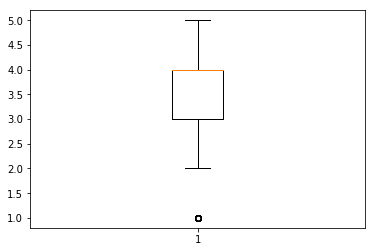

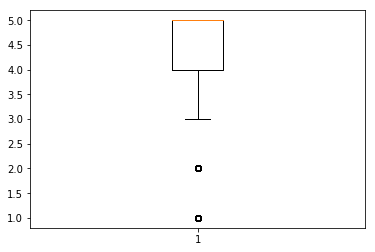

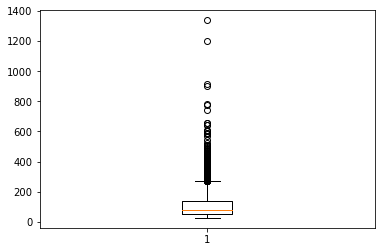

In [49]:
plt.boxplot(BarcelonaTripDF["hotelStars"])
plt.show()
plt.boxplot(BarcelonaTripDF["score"])
plt.show()
plt.boxplot(BarcelonaTripDF["wordCount"])
plt.show()

In [ ]:
for i in BarcelonaTripDF.iterrows():

In [18]:
type(BarcelonaTripDF.describe())
BarcelonaTripDF.describe()

,score
count,3072.000000
mean,4.235026
std,1.053488
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [14]:
BarcelonaTripDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
score,3072.0,4.235026,1.053488,1.0,4.0,5.0,5.0,5.0


In [16]:
BarcelonaTripDF["hotelStars"].describe().transpose()

count     3072
unique       7
top        4.0
freq      1393
Name: hotelStars, dtype: object

In [ ]:
# add another column which is the number of words in reviews


In [ ]:
# define a dataframe, columns = ["collection name", "count", "mean", "std", "min", "max", "score_1", "score_2",
# "score_3", "score_4", ]


In [ ]:
def calculate_grades(gradesList=[]):
# send back the box plot graph.
    
    return avg, mean, 

    